<a href="https://colab.research.google.com/github/OlyaMizonova/training-with-ml/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

from sklearn.model_selection import train_test_split

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
def toDF(filename):
  diction=unpickle(filename)
  del diction[b'batch_label']
  del diction[b'filenames']
  diction['labels'] = diction[b'labels']
  del diction[b'labels']
  diction['data'] = diction[b'data']
  del diction[b'data']
  df1=pd.DataFrame(diction['data'])
  df2=pd.DataFrame(diction['labels'])
  df2=df2.rename(columns={0:'type'})
  df=pd.concat([df1,df2],axis=1)
  return df

In [ ]:
df1=toDF('data_batch_1')
df2=toDF('data_batch_2')
df3=toDF('data_batch_3')
df4=toDF('data_batch_4')
df5=toDF('data_batch_5')
dfTest=toDF('test_batch')

In [ ]:
df=toDF('data_batch_2')

In [ ]:
def imag(arr):
  width = 32
  height = 32
  channels = 3
  img = np.zeros((height, width, channels), dtype=np.uint8)
  i=0
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      img[y][x][0] = arr[i]
      img[y][x][1] = arr[i+1024]
      img[y][x][2] = arr[i+2048]
      i+=1
  plt.figure(figsize=(2,2))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

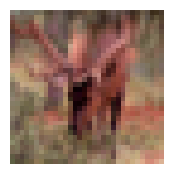

In [ ]:
imag(df.iloc[6].to_numpy())

In [108]:
df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,type
0,35,27,25,26,24,22,23,25,25,24,...,175,174,174,171,171,169,169,168,168,1
1,20,20,18,19,21,23,23,23,23,23,...,104,119,157,163,70,66,111,97,51,6
2,116,115,155,142,99,116,141,111,110,122,...,18,14,8,6,5,5,18,84,124,6
3,98,91,82,69,59,60,66,102,100,93,...,46,87,109,113,112,120,125,132,138,8
4,85,102,109,118,49,14,33,43,30,26,...,123,105,88,88,85,71,64,65,66,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,236,233,233,233,233,233,233,233,233,233,...,189,190,192,192,196,196,197,198,195,8
9996,231,231,232,230,230,231,234,236,235,235,...,134,144,147,147,161,172,170,170,176,8
9997,127,139,155,149,132,158,163,158,159,142,...,201,197,197,200,199,199,197,192,191,7
9998,190,200,208,208,208,208,207,204,203,203,...,163,161,162,162,162,162,163,182,192,2


In [ ]:
Y = df['type'].values
X = df.drop(['type'],axis=1).values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
def toTorchLoader(X_train,X_test,Y_train,Y_test):
  BATCH_SIZE = 32

  torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
  torch_Y_train = torch.from_numpy(Y_train).type(torch.LongTensor) # data type is long

  # create feature and targets tensor for test set.
  torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
  torch_Y_test = torch.from_numpy(Y_test).type(torch.LongTensor) # data type is long

  # Pytorch train and test sets
  train = torch.utils.data.TensorDataset(torch_X_train,torch_Y_train)
  test = torch.utils.data.TensorDataset(torch_X_test,torch_Y_test)

  # data loader
  train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
  test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [104]:
BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_Y_train = torch.from_numpy(Y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_Y_test = torch.from_numpy(Y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_Y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_Y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(3072,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,10)

    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)

mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=3072, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()
            predicted = torch.max(output.data, 1)[1]
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data.item(), float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))



In [ ]:
fit(mlp, train_loader)

Epoch : 0 [0/8500 (0%)]	Loss: 1.775666	 Accuracy:43.750%
Epoch : 0 [1600/8500 (19%)]	Loss: 1.728913	 Accuracy:31.189%
Epoch : 0 [3200/8500 (38%)]	Loss: 1.595893	 Accuracy:31.343%
Epoch : 0 [4800/8500 (56%)]	Loss: 1.883126	 Accuracy:31.312%
Epoch : 0 [6400/8500 (75%)]	Loss: 1.906307	 Accuracy:30.877%
Epoch : 0 [8000/8500 (94%)]	Loss: 2.087100	 Accuracy:30.702%
Epoch : 1 [0/8500 (0%)]	Loss: 1.790254	 Accuracy:31.250%
Epoch : 1 [1600/8500 (19%)]	Loss: 1.695239	 Accuracy:32.598%
Epoch : 1 [3200/8500 (38%)]	Loss: 1.635851	 Accuracy:32.890%
Epoch : 1 [4800/8500 (56%)]	Loss: 1.935869	 Accuracy:32.368%
Epoch : 1 [6400/8500 (75%)]	Loss: 1.663242	 Accuracy:31.390%
Epoch : 1 [8000/8500 (94%)]	Loss: 2.022791	 Accuracy:31.474%
Epoch : 2 [0/8500 (0%)]	Loss: 1.707762	 Accuracy:40.625%
Epoch : 2 [1600/8500 (19%)]	Loss: 1.717310	 Accuracy:31.618%
Epoch : 2 [3200/8500 (38%)]	Loss: 1.529185	 Accuracy:33.261%
Epoch : 2 [4800/8500 (56%)]	Loss: 1.812523	 Accuracy:32.761%
Epoch : 2 [6400/8500 (75%)]	Loss: 1.

In [ ]:
def evaluate(model):
#model = mlp
    correct = 0
    model.eval()
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
evaluate(mlp)

Test accuracy:0.313% 


In [122]:
torch_Y_train.shape

torch.Size([8500])

In [ ]:
torch_X_train.shape

torch.Size([8500, 3072])

In [ ]:
torch_X_test.shape

torch.Size([1500, 3072])

In [131]:
torch_X_train = torch_X_train.view(25500, 1, 32,32).float()#я понимаю что делает view,
torch_X_test = torch_X_test.view(4500,1,32,32).float()#но не понимаю, какие у нас тут должны быть новые размеры :(
print(torch_X_train.shape)
print(torch_X_test.shape)
print(torch_Y_train.shape)
print(torch_Y_test.shape)

torch.Size([25500, 1, 32, 32])
torch.Size([4500, 1, 32, 32])
torch.Size([1, 8500])
torch.Size([1500])


In [130]:
train = torch.utils.data.TensorDataset(torch_X_train,torch_Y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_Y_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

AssertionError: Size mismatch between tensors

In [117]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

cnn = CNN()
print(cnn)

it = iter(train_loader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


RuntimeError: shape '[-1, 576]' is invalid for input of size 32768